<a href="https://colab.research.google.com/github/Sawera557/LlamaIndex-RAG-On-Own-Data/blob/main/LlamaIndex_with_own_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LlamaIndex**

##LlamaIndex provides a complete set of tools for preparing and querying data for LLMs, including RAG.
LlamaIndex offers a comprehensive solution for integrating private data seamlessly with public data, facilitating the development of applications utilizing Large Language Models (LLMs).


At its core, LlamaIndex contains a toolkit designed to easily connect LLM’s with your external data.





1.   Creating and Quering Index
2.   Saving and Loading Index


In [1]:
!pip install llama-index pypdf sentence_transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.0 MB/s eta 0:00:00


By default, we use the OpenAI GPT-3 model.

https://docs.llamaindex.ai/en/stable/getting_started/installation/

In [ ]:
!pip install llama-index-core llama-index-readers-file llama-index-llms-ollama llama-index-embeddings-huggingface

Place your OpenAi Api key here

In [2]:
import os
import openai
openai.api_key = ""
os.environ["OPENAI_API_KEY"] = ""

##Creating Index

https://docs.llamaindex.ai/en/latest/guides/primer/index_guide.html

In [11]:
def insert_newline(text, every=15):
    words = text.split()
    result = ''
    for i, word in enumerate(words):
        result += word + ' '
        if (i + 1) % every == 0:
            result += '\n'
    return result


This is how you can store your documents in a folder and giving the path to folder

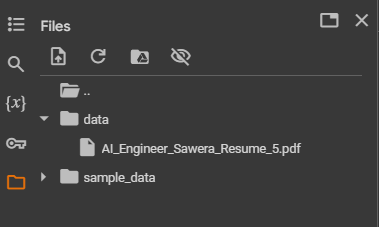

For This testing I'm utilizing my Resume

In [9]:
#from llama_index import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core import VectorStoreIndex,SimpleDirectoryReader,ServiceContext,PromptTemplate


documents = SimpleDirectoryReader('data').load_data()
index = VectorStoreIndex.from_documents(documents)
query_engine = index.as_query_engine()

Prompt: What is this text about?

In [13]:
response = query_engine.query("What is this text about?")
#print(response)
modified_response = insert_newline(str(response))
print(modified_response)

The text provides detailed information about the professional experience, skills, projects, and achievements of an 
AI Engineer named Sawera Khadium. It includes a summary of her work in AI projects 
such as NLP, Computer Vision, Machine Learning, Data Analytics, Generative AI, and Backend Development, along 
with her experience in developing various AI-related features and tools. Additionally, it mentions her proficiency 
in programming languages, frameworks, libraries, databases, web development, low-code tools, cloud tools, and generative AI 
models. 


Prompt: Who is this text about?

In [15]:
response = query_engine.query("who is this text about?")
modified_response = insert_newline(str(response))
print(modified_response)

The text is about Sawera Khadium, an AI Engineer with around 5 years of experience 
implementing AI projects in various fields such as NLP, Computer Vision, Machine Learning, Data Analytics, 
Generative AI, Conversational AI, and Back-end development. 


Prompt: When Did sawera started her career?

In [16]:
response = query_engine.query("When Did sawera started her career?")
modified_response = insert_newline(str(response))
print(modified_response)

Sawera started her career in January 2019. 


Prompt: List few of technical and soft skills sawera have

In [17]:
response = query_engine.query("list few of technical and soft skills sawera have")
print(response)

Technical Skills:
- Programming Languages: Python, C++, Typescript, JavaScript
- Frameworks: TensorFlow, PyTorch, Keras, Flask, Django, Fastai
- Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn, Wand, ImageMagick, OpenCV, Selenium
- Databases: SQL, MySQL, SQLite, MongoDB, GraphQL
- Web Development: Git, HTML, CSS, JavaScript, jQuery
- Low Code Tools: Retool, AirTable, Zapier, Zendesk, PandaDocs, Monday.com, ServiceTitans, PowerBi, Postman
- Cloud Tools: Google BigQuery, GCP, GCP Functions, Jupyter, Docker, AWS Sagemaker, S3, Polly, Azure OpenAI

Soft Skills:
- Passionate about AI engineering
- Adaptable to new challenges and technologies
- Strong problem-solving skills
- Effective communication skills
- Ability to work in a team
- Detail-oriented and quality-focused


Prompt: List links to her portfolio, linkedin and email

In [18]:
response = query_engine.query("List links to her portfolio, linkedin and email")
print(response)

sawerakhadium.com, linkedin.com/in/sawera-khadium, sawerakhadium557@gmail.com


Prompt: Does she have experience with speech to text or similar project can you mention where she implemented such project?

In [19]:
response = query_engine.query("Does she have experience with speech to text or similar project can you mention where she implemented such project?")
modified_response = insert_newline(str(response))
print(modified_response)

She has experience with Conversational AI projects, including implementing a chatbot with the OpenAI API. 



##Saving and Loading Index

Now we'll test from our stored index

In [20]:
index.storage_context.persist("sawera_index")

In [32]:
#from llama_index import StorageContext, load_index_from_storage
from llama_index.core.storage.storage_context import StorageContext
from llama_index.core import load_index_from_storage


# rebuild storage context
storage_context = StorageContext.from_defaults(persist_dir="sawera_index")
# load index
new_index = load_index_from_storage(storage_context)

Prompt: Who is this text about?

In [33]:
new_query_engine = new_index.as_query_engine()
response = new_query_engine.query("who is this text about?")
print(response)

The text is about Sawera Khadium, an AI Engineer with around 5 years of experience in implementing AI projects.


Prompt: Name the machine learning models sawera have trained?

In [41]:
new_query_engine = new_index.as_query_engine()
response = new_query_engine.query("Name the machine learning models sawera have trained?")
print(response)

VGG16, VGG19, ELA, CNN, LSTM, and RNN models.


Prompt: What's the best thing you liked about sawera?

In [45]:
new_query_engine = new_index.as_query_engine()
response = new_query_engine.query("What's the best thing you liked about sawera?")
modified_response = insert_newline(str(response))
print(modified_response)

The best thing about Sawera is her ability to implement any idea into reality, regardless 
of whether she has worked on that technology before or not. She has a passion 
for AI engineering and has delivered high-end projects in various AI fields, showcasing her adaptability 
and expertise. 




---

